In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [78]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-white.csv", sep=";")

In [79]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [80]:
# 결측치 확인
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [81]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [82]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [85]:
X = df.drop(columns=["quality"])
y_raw = df["quality"].copy()

In [86]:

le = LabelEncoder()
y = le.fit_transform(y_raw)  # ex) [3,4,5,6,7,8,9] -> [0..K-1]
classes = le.classes_
print("Class mapping (original -> encoded):")
for orig, enc in zip(classes, range(len(classes))):
    print(f"  {orig} -> {enc}")
print()

Class mapping (original -> encoded):
  3 -> 0
  4 -> 1
  5 -> 2
  6 -> 3
  7 -> 4
  8 -> 5
  9 -> 6



In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [88]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(
        multi_class="multinomial", solver="lbfgs", max_iter=2000, n_jobs=-1
    ),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors=11)
}
use_scaled = {"Logistic Regression", "KNN"}

In [94]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

metrics = {}
y_pred_dict = {}

for name, model in models.items():
    if name in use_scaled:
        model.fit(X_train_sc, y_train)
        y_pred = model.predict(X_test_sc)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    y_pred_dict[name] = y_pred
    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro", zero_division=0)
    metrics[name] = {"Accuracy": acc, "F1-macro": f1m}

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [95]:
print("=== Multiclass Classification Results (LabelEncoded quality) ===")
for name, vals in metrics.items():
    print(f"{name:18} | Acc: {vals['Accuracy']:.4f} | F1-macro: {vals['F1-macro']:.4f}")

=== Multiclass Classification Results (LabelEncoded quality) ===
Logistic Regression | Acc: 0.5316 | F1-macro: 0.2234
Decision Tree      | Acc: 0.6061 | F1-macro: 0.3595
Random Forest      | Acc: 0.6990 | F1-macro: 0.5019
KNN                | Acc: 0.5622 | F1-macro: 0.3767


In [96]:
best_name = max(metrics, key=lambda k: (metrics[k]["F1-macro"], metrics[k]["Accuracy"]))
print(f"\nBest by F1-macro: {best_name}\n")

best_pred = y_pred_dict[best_name]
print("Classification report (encoded labels):")
print(classification_report(y_test, best_pred, digits=4))


Best by F1-macro: Random Forest

Classification report (encoded labels):
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         5
           1     0.6000    0.2400    0.3429        25
           2     0.7163    0.6942    0.7051       291
           3     0.6673    0.8079    0.7309       432
           4     0.7687    0.5885    0.6667       192
           5     0.8333    0.4286    0.5660        35

    accuracy                         0.6990       980
   macro avg     0.5976    0.4599    0.5019       980
weighted avg     0.7025    0.6990    0.6911       980



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [97]:
cm = confusion_matrix(y_test, best_pred)
print("\nConfusion Matrix (rows=true, cols=pred):")
print(cm)



Confusion Matrix (rows=true, cols=pred):
[[  0   0   2   3   0   0]
 [  0   6  11   8   0   0]
 [  0   4 202  83   2   0]
 [  0   0  61 349  22   0]
 [  0   0   5  71 113   3]
 [  0   0   1   9  10  15]]


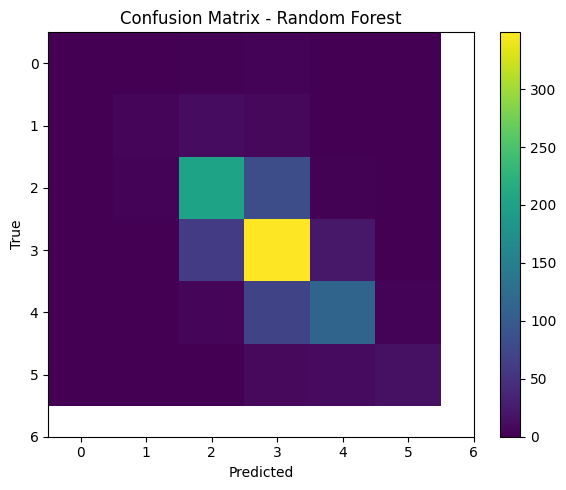

In [98]:
plt.figure(figsize=(6,5))
plt.imshow(cm, aspect='auto')
plt.title(f"Confusion Matrix - {best_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.xticks(range(len(classes)), range(len(classes)))
plt.yticks(range(len(classes)), range(len(classes)))
plt.tight_layout()
plt.show()

In [99]:
lr = models["Logistic Regression"]
lr_coef = lr.coef_
lr_intercept = lr.intercept_

In [100]:
print("\n=== Logistic Regression parameters ===")
print(f"coef_.shape = {lr_coef.shape} (n_classes x n_features), intercept_.shape = {lr_intercept.shape}")
print("Classes(order):", list(classes))


=== Logistic Regression parameters ===
coef_.shape = (7, 11) (n_classes x n_features), intercept_.shape = (7,)
Classes(order): [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


In [101]:
abs_mean_coef = np.mean(np.abs(lr_coef), axis=0)
top_idx = np.argsort(abs_mean_coef)[::-1][:8]
print("\nTop 8 features by |coef| (mean across classes):")
for i in top_idx:
    print(f"  {X.columns[i]:20s}  | mean|w|={abs_mean_coef[i]:.4f}")


Top 8 features by |coef| (mean across classes):
  density               | mean|w|=0.7436
  residual sugar        | mean|w|=0.6704
  alcohol               | mean|w|=0.5460
  fixed acidity         | mean|w|=0.5342
  pH                    | mean|w|=0.4230
  chlorides             | mean|w|=0.4213
  volatile acidity      | mean|w|=0.4096
  free sulfur dioxide   | mean|w|=0.3188


In [103]:
lr_model = LogisticRegression(
    multi_class="multinomial", solver="lbfgs", max_iter=2000, n_jobs=-1
)
lr_model.fit(X_train_sc, y_train)

print("\n[Logistic Regression] coef_ shape:", lr_model.coef_.shape,
      "| intercept_ shape:", lr_model.intercept_.shape)
print("Classes(order):", le.classes_.tolist())


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



[Logistic Regression] coef_ shape: (7, 11) | intercept_ shape: (7,)
Classes(order): [3, 4, 5, 6, 7, 8, 9]


In [105]:
feature_names = X.columns.tolist()
coefs = lr_model.coef_            # shape: (K, D)
intercepts = lr_model.intercept_  # shape: (K,)

print("\n=== Full Intercepts by Class (b_k) ===")
for k, cls in enumerate(le.classes_):
    print(f"Class {cls} (encoded {k}): intercept b_k = {intercepts[k]:.6f}")

topn = 5
print("\n=== Top-|coef| Features per Class (w_k) ===")
for k, cls in enumerate(le.classes_):
    abs_coefs = np.abs(coefs[k])
    top_idx = abs_coefs.argsort()[::-1][:topn]
    tops = [(feature_names[j], coefs[k, j]) for j in top_idx]
    print(f"Class {cls} (encoded {k}) top {topn}:",
          ", ".join([f"{name}:{val:.4f}" for name,val in tops]))


=== Full Intercepts by Class (b_k) ===
Class 3 (encoded 0): intercept b_k = -2.434498
Class 4 (encoded 1): intercept b_k = -0.111316
Class 5 (encoded 2): intercept b_k = 2.540310
Class 6 (encoded 3): intercept b_k = 3.246899
Class 7 (encoded 4): intercept b_k = 1.876037
Class 8 (encoded 5): intercept b_k = 0.085818
Class 9 (encoded 6): intercept b_k = -5.203249

=== Top-|coef| Features per Class (w_k) ===
Class 3 (encoded 0) top 5: fixed acidity:0.7933, volatile acidity:0.5323, chlorides:0.5109, free sulfur dioxide:0.4723, alcohol:-0.4304
Class 4 (encoded 1) top 5: density:1.2398, residual sugar:-1.2381, free sulfur dioxide:-0.7841, volatile acidity:0.6394, alcohol:-0.5918
Class 5 (encoded 2) top 5: alcohol:-0.8888, density:0.6716, residual sugar:-0.5142, fixed acidity:-0.4963, pH:-0.4925
Class 6 (encoded 3) top 5: density:0.6910, fixed acidity:-0.6184, pH:-0.4743, volatile acidity:-0.3392, chlorides:0.2723
Class 7 (encoded 4) top 5: density:-0.9848, residual sugar:0.9213, volatile ac

In [106]:
target_feature = "alcohol"
j = feature_names.index(target_feature)

x_min, x_max = X_train[target_feature].min(), X_train[target_feature].max()
x_grid = np.linspace(x_min, x_max, 300)

X_train_sc_mean = X_train_sc.mean(axis=0)

X_grid_sc = np.tile(X_train_sc_mean, (len(x_grid), 1))
X_mean_orig = X_train.mean(axis=0).values.reshape(1, -1)
X_point_orig = np.repeat(X_mean_orig, len(x_grid), axis=0)
X_point_orig[:, j] = x_grid  # 타깃 특성만 그리드로 치환
X_point_sc = scaler.transform(X_point_orig)  # 11차원 스케일
X_grid_sc = X_point_sc  # 그대로 사용

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [107]:
probs = lr_model.predict_proba(X_grid_sc)

w = coefs           # (K, D)
b = intercepts      # (K,)
mean_sc = X_train_sc_mean  # (D,)

b_tilde = []
for k in range(w.shape[0]):
    b_eff = b[k] + np.dot(w[k], mean_sc) - w[k, j] * mean_sc[j]
    b_tilde.append(b_eff)

print(f"\n=== Effective slope/intercept for feature '{target_feature}' (scaled space) ===")
for k, cls in enumerate(le.classes_):
    slope_k = w[k, j]
    intercept_k = b_tilde[k]
    print(f"Class {cls} (enc {k}): slope a_k = {slope_k:.6f},  intercept b_k~ = {intercept_k:.6f}")


=== Effective slope/intercept for feature 'alcohol' (scaled space) ===
Class 3 (enc 0): slope a_k = -0.430424,  intercept b_k~ = -2.434498
Class 4 (enc 1): slope a_k = -0.591759,  intercept b_k~ = -0.111316
Class 5 (enc 2): slope a_k = -0.888829,  intercept b_k~ = 2.540310
Class 6 (enc 3): slope a_k = 0.233861,  intercept b_k~ = 3.246899
Class 7 (enc 4): slope a_k = 0.164310,  intercept b_k~ = 1.876037
Class 8 (enc 5): slope a_k = 0.623681,  intercept b_k~ = 0.085818
Class 9 (enc 6): slope a_k = 0.889160,  intercept b_k~ = -5.203249


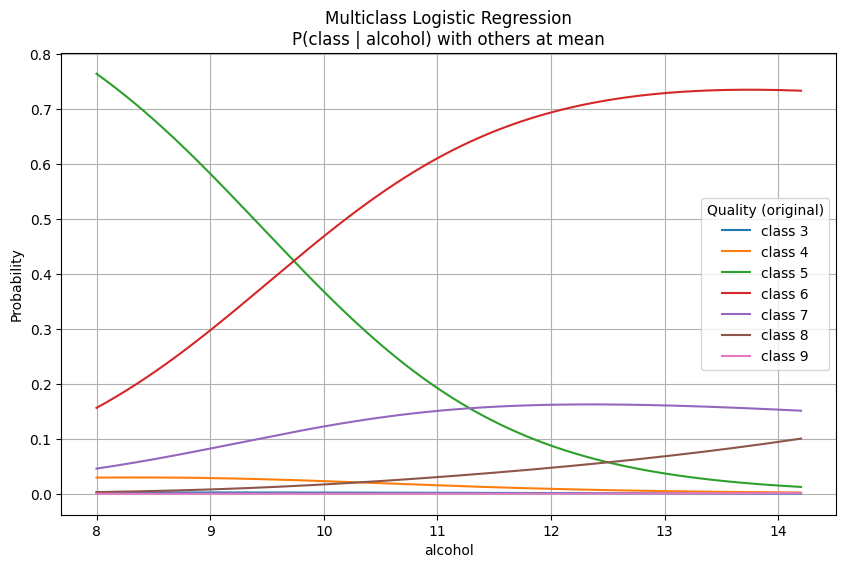

In [108]:
plt.figure(figsize=(10,6))
for k, cls in enumerate(le.classes_):
    plt.plot(x_grid, probs[:, k], label=f"class {cls}")

plt.title(f"Multiclass Logistic Regression\nP(class | {target_feature}) with others at mean")
plt.xlabel(target_feature)
plt.ylabel("Probability")
plt.legend(title="Quality (original)")
plt.grid(True)
plt.show()